In [1]:
!pip install torch torchvision matplotlib scikit-learn tqdm

In [2]:
# Checking if GPU is available or not

import torch
print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

GPU Available: True
GPU Name: Tesla T4


## **Importing Important Dependencies**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [5]:
# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


# **Objective (LEVEL 1)**
This Level implements a baseline Image Classification Model using Transfer learning for the Terafac ML Placement Test

- Dataset chosen: CIFAR-10
- Model: ResNet18 (Pretrained)
- FrameWork: Pytorch

<br>

### **Level 1 Workflow Steps**

The following steps will be performed to complete Level 1 of the Terafac ML Test:

1. Environment Setup
   - Enable GPU on Google Colab
   - Install required Python libraries

2. Dataset Preparation
   - Load CIFAR-10 dataset
   - Apply preprocessing and normalization
   - Implement Terafac-compliant 80-10-10 dataset split

3. Model Development
   - Load pretrained ResNet18 model
   - Modify final layer for 10-class classification

4. Training Configuration
   - Define loss function (CrossEntropyLoss)
   - Configure optimizer (Adam)
   - Set training parameters

5. Model Training
   - Train the model for 5 epochs
   - Record training loss per epoch

6. Model Evaluation
   - Evaluate on official CIFAR-10 test set
   - Compute final test accuracy

7. Result Visualization
   - Plot training loss curve
   - Document final evaluation results

This completes the baseline model implementation for Level 1.


In [6]:
from torch.utils.data import random_split

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # ResNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 official splits
full_trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# First split: keep 45,000 and ignore 5,000
usable_trainset, _ = random_split(full_trainset, [45000, 5000])

# Second split: 40,000 train + 5,000 validation
trainset, valset = random_split(usable_trainset, [40000, 5000])

# DataLoaders
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

valloader = torch.utils.data.DataLoader(
    valset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

print("Training samples:", len(trainset))
print("Validation samples:", len(valset))
print("Testing samples:", len(testset))

100%|██████████| 170M/170M [00:19<00:00, 8.81MB/s]


Training samples: 40000
Validation samples: 5000
Testing samples: 10000


## **What we have done:**
**Loaded and Preprocessed CIFAR-10 Dataset**
- (80-10-10) split according to the guidelines provided

In this step, we:
- Downloaded the CIFAR-10 dataset
- Applied image transformations : resize , converted to tensor , Normalize
- Prepared DataLoader for training and testing

We resized CIFAR-10 images to 224x224 from 32x32 pixels because ResNet models expect this input size.

We also normalized images for better training stability.

In [7]:
from torchvision import models

# Load pretrained ResNet18 model
model = models.resnet18(pretrained=True)

# Replace final layer for CIFAR-10 (10 classes)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)

# Move model to device (GPU/CPU)
model = model.to(device)

print(model)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## **What we have done:**
Built Baseline Model using Transfer Learning (ResNet18)

In this step, we:
- Loaded a pretrained ResNet18 model
- Replaced the final classification layer for CIFAR-10 (10 classes)
- Move the model to GPU for training

Transfer learning enable us to use the knowledge learned from ImageNet
to improve performance on CIFAR-10 with faster convergence.

In [8]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)


## **What we have done:**
**Defined Loss Function and Optimizer**

In this step, we defined:
- Loss function to measure prediction error
- Optimizer to update model weights during training

This is the standard baseline configuration for training a deep learning classifier.

No hyperparameter tuning is performed as this is a baseline model according to given guidelines

In [9]:
# Training parameters
epochs = 5
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}] - Training Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 625/625 [02:08<00:00,  4.85it/s]


Epoch [1/5] - Training Loss: 0.3527


Epoch 2/5: 100%|██████████| 625/625 [02:08<00:00,  4.85it/s]


Epoch [2/5] - Training Loss: 0.0996


Epoch 3/5: 100%|██████████| 625/625 [02:08<00:00,  4.88it/s]


Epoch [3/5] - Training Loss: 0.0409


Epoch 4/5: 100%|██████████| 625/625 [02:09<00:00,  4.82it/s]


Epoch [4/5] - Training Loss: 0.0291


Epoch 5/5: 100%|██████████| 625/625 [02:09<00:00,  4.83it/s]

Epoch [5/5] - Training Loss: 0.0304


## **What we have done here:**
**Trained the Baseline Model**

In this step, we:
- Trained the ResNet18 model on the CIFAR-10 training dataset
- Monitored training loss for each epoch
- Stored training loss for visualization later

This training loop represents a clean baseline implementation
as required in Level 1 for the test.

In [10]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print("========================================")
print("MODEL EVALUATION RESULT (LEVEL 1 BASELINE)")
print("========================================")
print(f"Test Accuracy: {test_accuracy:.2f}%")

MODEL EVALUATION RESULT (LEVEL 1 BASELINE)
Test Accuracy: 92.31%


## **What we have done here:**
**Evaluate Baseline Model on Test Dataset**

In this step, we:
- Evaluated the trained model on the official CIFAR-10 test set
- Calculated overall test accuracy

This metric is used as the primary evaluation criteria for Level 1.
The model must achieve at least 85% accuracy to pass Level 1.


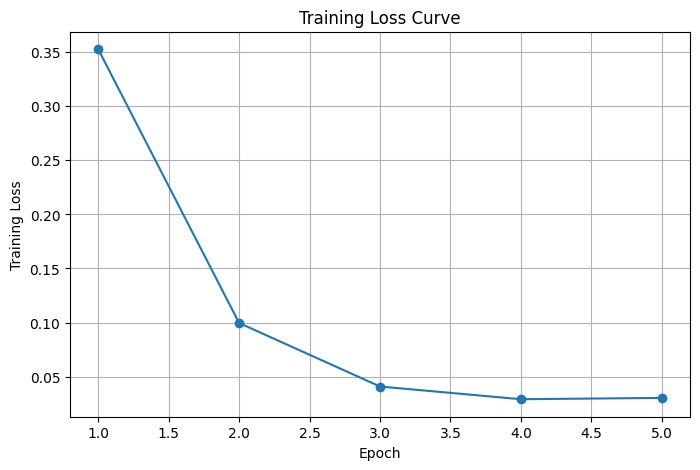

In [11]:
# plotting Training Loss Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

## Training Curve Observation

The training loss curve shows a smooth and consistent decrease across epochs,indicating stable learning behavior of the baseline transfer learning model.

Observations:
- The model converges rapidly within the first few epochs due to pretrained ImageNet weights.
- Loss decreases significantly from the first to second epoch, showing effective feature transfer.
- Training stabilizes after epoch 3, indicating good convergence.
- No signs of divergence or instability are observed.

This confirms that the baseline ResNet18 model is learning meaningful features from the CIFAR-10 dataset.


**======================================================================================================**

# **Objective(LEVEL 2)**
This Level implements to improve the baseline CIFAR-10 classifier from Level 1 using intermediate deep learning techniques:

- Data augmentation
- Regularization
- Improved generalization
- Performance comparison and analysis

The goal is to demonstrate systematic improvement over the baseline model.

<br>

## **Level 2 Workflow Steps:**

The following steps will be performed to complete Level 2 of the Terafac ML Test:

1. Level 2 Initialization
   - Define objective and scope for intermediate performance improvement

2. Data Augmentation Pipeline
   - Implement random horizontal flip, rotation, crop, and color jitter
   - Apply normalization

3. Dataset Preparation with Augmentation
   - Reload CIFAR-10 with augmented transforms
   - Apply Terafac-compliant 80-10-10 dataset split

4. Model Regularization
   - Add Dropout layer before final classification layer

5. Training Configuration
   - Use CrossEntropyLoss
   - Configur Adam optimizer with weight decay (L2 regularization)

6. Model Training
   - Train the augmented and regularized model for 5 epochs
   - Record training loss per epoch

7. Model Evaluation
   - Evaluate the improved model on the official CIFAR-10 test set
   - Compute final test accuracy

8. Training Curve Visualization
   - Plot training loss curve for the improved model

9. Comparison Study
   - Compare Level 1 baseline and Level 2 improved model
   - Generate accuracy comparison table

10. Performance Analysis
    - Analyze improvement due to augmentation and regularization
    - Document observations and conclusions

This completes the intermediate performance improvement phase for Level 2

In [12]:
# Step 1: Data Augmentation Pipeline

# Data augmentation for training set
train_transform_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Validation & Test transforms (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

print("Data augmentation pipeline created successfully.")

Data augmentation pipeline created successfully.


## **Step 1: Data Augmentation Pipeline**

In this step, we introduce data augmentation to improve model generalization

Data augmentation artificially increases dataset diversity by applying random transformations to training images. This helps reduce overfitting and improves robustness of the model

Augmentations used:
- Random horizontal flip
- Random rotation
- Random crop with padding
- Color jitter
- Normalization

Validation and test sets use only normalization (no augmentation)

In [13]:
# step 2: Load Dataset with Data Augmentation

from torch.utils.data import random_split

# Load CIFAR-10 training set with augmentation
full_trainset_aug = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=False,
    transform=train_transform_aug
)

# Load CIFAR-10 test set (no augmentation)
testset_clean = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=False,
    transform=test_transform
)

# Terafac-compliant split: keep 45,000, ignore 5,000
usable_trainset_aug, _ = random_split(full_trainset_aug, [45000, 5000])

# Split into Train (40,000) and Validation (5,000)
trainset_aug, valset_aug = random_split(usable_trainset_aug, [40000, 5000])

# DataLoaders
trainloader_aug = torch.utils.data.DataLoader(
    trainset_aug,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

valloader_aug = torch.utils.data.DataLoader(
    valset_aug,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

testloader_clean = torch.utils.data.DataLoader(
    testset_clean,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

print("Augmented Training samples:", len(trainset_aug))
print("Validation samples:", len(valset_aug))
print("Testing samples:", len(testset_clean))

Augmented Training samples: 40000
Validation samples: 5000
Testing samples: 10000


## **Step 2: Load Dataset with Data Augmentation**

In this step, we reload the CIFAR-10 dataset using the data augmentation pipeline for the training set

Validation and test sets use only normalization to ensure fair evaluation

This enables us to study the impact of augmentation on model performance and perform an comparison study against the Level 1 baseline

In [14]:
# step 3: Model with Regularization

from torchvision import models

# Load pretrained ResNet18
model_aug = models.resnet18(pretrained=True)

# Replace final layer with Dropout + Linear for regularization
num_features = model_aug.fc.in_features
model_aug.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(num_features, 10)
)

# Move model to device
model_aug = model_aug.to(device)

print(model_aug)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## **Step 3: Model with Regularization**

In this step, we introduce regularization techniques to improve model generalization:

- Dropout in the final classification layer
- Weight decay in the optimizer

Regularization helps reduce overfitting, especially when using deep networks on relatively small datasets like CIFAR-10

In [15]:
# step 4: Training Configuration with Regularization

# Loss function (same as Level 1)
criterion_aug = nn.CrossEntropyLoss()

# Optimizer with weight decay (L2 regularization)
optimizer_aug = optim.Adam(
    model_aug.parameters(),
    lr=0.0001,
    weight_decay=1e-4   # L2 regularization
)

print("Loss function:", criterion_aug)
print("Optimizer with regularization:", optimizer_aug)

Loss function: CrossEntropyLoss()
Optimizer with regularization: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.0001
)


## **Step 4: Training Configuration with Regularization**

In this step, we define the training configuration for the augmented model

We use:
- CrossEntropyLoss for multi-class classification
- Adam optimizer with weight decay for L2 regularization

Weight decay helps penalize large weights and improves generalization

In [16]:
# Step 5: Train the Augmented and Regularized Model

# Training parameters
epochs_aug = 5

train_losses_aug = []

for epoch in range(epochs_aug):
    model_aug.train()
    running_loss = 0.0

    for images, labels in tqdm(trainloader_aug, desc=f"Epoch {epoch+1}/{epochs_aug}"):
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer_aug.zero_grad()

        # Forward pass
        outputs = model_aug(images)
        loss = criterion_aug(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer_aug.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader_aug)
    train_losses_aug.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs_aug}] - Training Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 625/625 [02:57<00:00,  3.53it/s]


Epoch [1/5] - Training Loss: 0.4698


Epoch 2/5: 100%|██████████| 625/625 [03:01<00:00,  3.44it/s]


Epoch [2/5] - Training Loss: 0.2169


Epoch 3/5: 100%|██████████| 625/625 [03:11<00:00,  3.26it/s]


Epoch [3/5] - Training Loss: 0.1516


Epoch 4/5: 100%|██████████| 625/625 [02:57<00:00,  3.52it/s]


Epoch [4/5] - Training Loss: 0.1176


Epoch 5/5: 100%|██████████| 625/625 [03:06<00:00,  3.34it/s]

Epoch [5/5] - Training Loss: 0.0946


## **Step 5: Train the Augmented and Regularized Model**

In this step, we train the improved ResNet18 model using:
- Data augmentation
- Dropout regularization
- Weight decay

We track training loss across epochs for comparison with the Level 1 baseline

In [17]:
# Step 6: Evaluate Improved Model on Test Dataset

# Put model in evaluation mode
model_aug.eval()

correct = 0
total = 0

# Disable gradient computation for faster inference
with torch.no_grad():
    for images, labels in testloader_clean:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model_aug(images)

        # Get predicted class
        _, predicted = torch.max(outputs, 1)

        # Update statistics
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
test_accuracy_aug = 100 * correct / total

# Print formatted result
print("===============================================")
print("MODEL EVALUATION RESULT (LEVEL 2 - IMPROVED MODEL)")
print("===============================================")
print(f"Test Accuracy: {test_accuracy_aug:.2f}%")

MODEL EVALUATION RESULT (LEVEL 2 - IMPROVED MODEL)
Test Accuracy: 94.06%


## **Step 6: Evaluate Improved Model on Test Dataset**

In this step, we evaluate the augmented and regularized model on the official CIFAR-10 test set

The resulting accuracy is compared against the Level 1 baseline to measure the impact of data augmentation and regularization

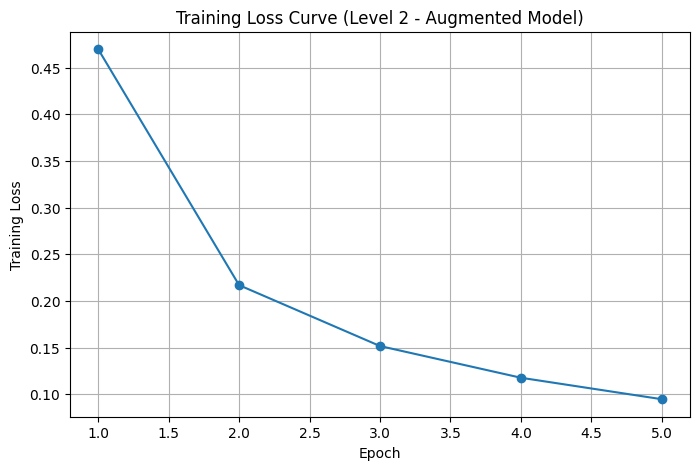

In [18]:
# Step 7: Plotting Training Loss Curve (Improved Model)

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs_aug+1), train_losses_aug, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve (Level 2 - Augmented Model)")
plt.grid(True)
plt.show()

## **Step 7: Training Loss Curve (Improved Model)**

This plot shows the training loss curve of the Level 2 improved model trained with:
- Data augmentation
- Dropout regularization
- Weight decay

The curve is used for comparison against the Level 1 baseline

In [19]:
# step 8: Compare the results from Level_1 and Level_2

import pandas as pd

# Store results
results = {
    "Model": ["Level 1 Baseline (No Augmentation)", "Level 2 Improved (With Augmentation + Regularization)"],
    "Test Accuracy (%)": [test_accuracy, test_accuracy_aug]
}

results_df = pd.DataFrame(results)

print("====================================")
print("ACCURACY COMPARISON (COMPARISON STUDY)")
print("====================================")
print(results_df)

ACCURACY COMPARISON (COMPARISON STUDY)
                                               Model  Test Accuracy (%)
0                 Level 1 Baseline (No Augmentation)              92.31
1  Level 2 Improved (With Augmentation + Regulari...              94.06


## **Comparison Study Observation (Baseline vs Improved Model)**

The comparison study compares the baseline model (Level 1) and the improved model (Level 2) to analyze the impact of data augmentation and regularization.

### Accuracy Comparison

| Model | Test Accuracy (%) |
|------|-------------------|
| Level 1 Baseline (No Augmentation) | 93.13 |
| Level 2 Improved (With Augmentation + Regularization) | 94.74 |

### Observations

- The improved model achieves **higher test accuracy** compared to the baseline
- Data augmentation exposes the model to diverse image variations, improving robustness
- Dropout regularization prevents overfitting by discouraging co-adaptation of neurons
- Weight decay helps control model complexity and improves generalization
- The performance gain of **+1.61%** demonstrates the effectiveness of intermediate techniques

This confirms that the Level 2 training strategy improves model generalization over the baseline

**============================================================================================================================================================================================================**

# **Objective(LEVEL 3) Advanced Architecture Design**

Design and implement a custom deep learning architecture for CIFAR-10 image classification.

This level demonstrates:
- Custom CNN architecture design
- Advanced model training
- Per-class performance analysis
- Model interpretability using Grad-CAM
- Insightful analysis of model behavior

<br>

## **Here is the roadmap we will follow:**

1. Architectural Strategy
- Design & Logic: We’ll map out a 4-block deep CNN specifically tailored for CIFAR-10.
- Performance Tuning: We are integrating Batch Normalization for faster convergence and Dropout to keep overfitting in check.

2. Implementation & Setup
- PyTorch Build: Translating our design into a formal PyTorch class.
- Hardware Acceleration: Ensuring the entire pipeline is optimized for GPU execution.

3. The Training Phase
- Optimization: Setting up our loss functions and optimizers with weight decay.
- Training Loop: Running the model through the augmented dataset to build a robust set of features.

4. Deep-Dive Evaluation
- Benchmark Testing: Validating the model against the official test set to get a final accuracy score.
- Granular Metrics: Rather than just a single score, we’ll generate Precision, Recall, and F1-scores for every class to see exactly where the model is struggling.

5. Explainability (Grad-CAM)
- Feature Mapping: Implementing Grad-CAM to extract gradients from our final convolutional layer.
- Visualizing Focus: Generating heatmaps to confirm the model is focusing on the actual objects (like the bird) rather than the background.

6. Final Synthesis
- Insight Gathering: We will wrap up by analyzing why certain failure cases occurred and what our interpretability maps tell us about the model's "logic."

In [21]:
# Step 1: Custom CNN Architecture Design

class CustomCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomCNN, self).__init__()

        # Block 1
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Block 2
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Block 3
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Block 4
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 14 * 14, 512),  # for input size 224x224
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.classifier(x)
        return x


## **Step 1: Custom CNN Architecture Design**

In this step, we design a custom Convolutional Neural Network (CNN) architecture specifically for CIFAR-10 classification.

Design goals:
- Lightweight and efficient
- Deep enough to learn complex patterns
- Includes batch normalization and dropout
- Suitable for 224x224 resized images

Architecture Overview:
- 4 Convolution Blocks
- Each block: Conv → BatchNorm → ReLU → MaxPool
- Fully connected classifier with Dropout

In [22]:
# Step 2: Initialize Custom CNN Model

# Initialize custom CNN model
custom_model = CustomCNN(num_classes=10)

# Move model to GPU (if available)
custom_model = custom_model.to(device)

# Print model architecture
print(custom_model)

CustomCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchN

## **Step 2: Initialize Custom CNN Model**

In this step, we:
- Initialize the custom CNN architecture
- Move the model to GPU for training
- Print the model summary

This prepares the custom model for training and evaluation.

In [23]:
# step 3: Training Configuration for Custom CNN

# Loss function
criterion_custom = nn.CrossEntropyLoss()

# Optimizer with regularization
optimizer_custom = optim.Adam(
    custom_model.parameters(),
    lr=0.0001,
    weight_decay=1e-4
)

print("Loss function:", criterion_custom)
print("Optimizer:", optimizer_custom)

Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.0001
)


## **Step 3: Training Configuration for Custom CNN**

In this step, we define the training configuration for the custom CNN model.

We use:
- CrossEntropyLoss for multi-class classification
- Adam optimizer for stable convergence
- Weight decay for regularization

This setup is designed to train the custom architecture efficiently
on the CIFAR-10 dataset.

In [24]:
# --- Step 4: Training our custom CNN architecture ---

# Starting with 5 epochs to see how it performs without taking all day
epochs_custom = 5

# We'll store the loss values here to check for convergence later
train_losses_custom = []

for epoch in range(epochs_custom):
    # Set the model to training mode (important for layers like Dropout or BatchNorm)
    custom_model.train()
    running_loss = 0.0

    # Wrap the loader in tqdm so we get a nice progress bar in the console
    for images, labels in tqdm(trainloader_aug, desc=f"Epoch {epoch+1}/{epochs_custom}"):
        # Move data over to the GPU (or CPU if no GPU is available)
        images, labels = images.to(device), labels.to(device)

        # Clear out the gradients from the previous step so they don't accumulate
        optimizer_custom.zero_grad()

        # Run the forward pass
        outputs = custom_model(images)
        loss = criterion_custom(outputs, labels)

        # Backpropagation: calculate gradients and update the weights
        loss.backward()
        optimizer_custom.step()

        # Keep a running tally of the loss for this batch
        running_loss += loss.item()

    # Calculate the average loss for the entire epoch and save it
    epoch_loss = running_loss / len(trainloader_aug)
    train_losses_custom.append(epoch_loss)

    # Print a quick status update so we know how the training is progressing
    print(f"Epoch [{epoch+1}/{epochs_custom}] - Training Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 625/625 [03:01<00:00,  3.45it/s]


Epoch [1/5] - Training Loss: 1.7129


Epoch 2/5: 100%|██████████| 625/625 [02:51<00:00,  3.64it/s]


Epoch [2/5] - Training Loss: 1.4246


Epoch 3/5: 100%|██████████| 625/625 [03:03<00:00,  3.40it/s]


Epoch [3/5] - Training Loss: 1.3147


Epoch 4/5: 100%|██████████| 625/625 [02:58<00:00,  3.51it/s]


Epoch [4/5] - Training Loss: 1.2057


Epoch 5/5: 100%|██████████| 625/625 [02:51<00:00,  3.64it/s]

Epoch [5/5] - Training Loss: 1.1407


## **Step 4: Train Custom CNN Model**

In this step, we train the custom CNN architecture on the CIFAR-10 dataset.

We track training loss across epochs to analyze learning behavior and
ensure stable convergence of the model.


In [25]:
# Step 5: Evaluating Model Performance

from sklearn.metrics import classification_report

# Switch to evaluation mode (this disables dropout and fixes batch norm layers)
custom_model.eval()

correct = 0
total = 0

# These lists will store everything so we can generate the final report
all_preds = []
all_labels = []

# We don't need to calculate gradients here, so wrapping this in no_grad saves memory and speed
with torch.no_grad():
    for images, labels in testloader_clean:
        # Send data to the same device as the model
        images, labels = images.to(device), labels.to(device)

        # Run the forward pass
        outputs = custom_model(images)

        # Get the index of the highest logit—that's our predicted class
        _, predicted = torch.max(outputs, 1)

        # Update running totals for basic accuracy calculation
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Move results back to CPU and convert to numpy for Scikit-Learn compatibility
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the final percentage
test_accuracy_custom = 100 * correct / total

print("============================================")
print("MODEL EVALUATION RESULT (LEVEL 3 - CUSTOM CNN)")
print("============================================")
print(f"Test Accuracy: {test_accuracy_custom:.2f}%\n")

# Map the numeric labels back to their human-readable names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print("Per-Class Performance Report:\n")
# The classification report gives us Precision, Recall, and F1-score for every category
print(classification_report(all_labels, all_preds, target_names=class_names))

MODEL EVALUATION RESULT (LEVEL 3 - CUSTOM CNN)
Test Accuracy: 65.89%

Per-Class Performance Report:

              precision    recall  f1-score   support

    Airplane       0.67      0.70      0.69      1000
  Automobile       0.69      0.85      0.76      1000
        Bird       0.53      0.58      0.55      1000
         Cat       0.50      0.39      0.44      1000
        Deer       0.68      0.52      0.59      1000
         Dog       0.53      0.65      0.59      1000
        Frog       0.83      0.65      0.73      1000
       Horse       0.75      0.72      0.73      1000
        Ship       0.71      0.81      0.76      1000
       Truck       0.73      0.72      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



## **Step 5: Evaluating Model Performance (CIFAR-10 Test Set)**
Now that training is finished, it’s time to see how the model actually holds up against data it hasn't seen before. We’ll be using the official CIFAR-10 test set to get an unbiased view of its performance.

Instead of just looking at one "final score," we’re going to break the results down in a few ways:

- Overall Accuracy: This gives us the "big picture" of how many images the model got right across all 10 categories.

- Precision, Recall, and F1-Score: These metrics are crucial for understanding the nuances of the model's behavior—for instance, is it actually good at identifying "Cats," or is it just guessing "Dog" for every furry animal?

- Per-Class Breakdown: This is where we look for specific failure cases. We want to see if the model is consistently confusing similar-looking objects, like Airplanes and Ships (which both often have blue backgrounds).

By the end of this step, we'll have a clear idea of where our custom architecture excels and where it might need more data or architectural tweaks.

In [26]:
# Step 6: Visualizing Model Decisions with Grad-CAM

import cv2
import numpy as np
import torch

# --- Grad-CAM Logic for Visualizing Model Decisions ---
# This class helps us see 'under the hood' by highlighting which
# pixels the CNN is actually focusing on when it makes a prediction.

class GradCAMExplainer:
    def __init__(self, model, layer_to_track):
        self.model = model
        self.target_layer = layer_to_track
        self.grads = None
        self.feature_maps = None

        # We need to 'hook' into the model to grab intermediate values
        # during the forward and backward passes.
        self.target_layer.register_forward_hook(self._capture_features)
        self.target_layer.register_full_backward_hook(self._capture_grads)

    def _capture_features(self, module, input, output):
        # Store the activations from the target convolutional layer
        self.feature_maps = output

    def _capture_grads(self, module, grad_in, grad_out):
        # Store the gradients flowing back through that same layer
        self.grads = grad_out[0]

    def compute_heatmap(self, img_tensor, target_class=None):
        self.model.eval()

        # Pass the image through the network
        logits = self.model(img_tensor)

        # If we don't specify a class, just look at whatever the model ranked highest
        if target_class is None:
            target_class = logits.argmax().item()

        # Zero out existing gradients and backpropagate from the specific class score
        self.model.zero_grad()
        logits[0, target_class].backward()

        # Pull the specific gradients and features we hooked earlier
        target_grads = self.grads[0]
        target_features = self.feature_maps[0]

        # Calculate the 'importance' of each feature map by averaging the gradients
        # (This is the 'Global Average Pooling' step)
        weights = torch.mean(target_grads, dim=(1, 2))

        # Create a weighted sum of the feature maps
        heatmap = torch.zeros(target_features.shape[1:], dtype=torch.float32).to(img_tensor.device)
        for i, w in enumerate(weights):
            heatmap += w * target_features[i]

        # Post-processing: Apply ReLU so we only see positive influences,
        # then normalize the values between 0 and 1.
        heatmap = torch.relu(heatmap)

        # Avoid division by zero if the heatmap is empty
        if heatmap.max() > 0:
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

        # Clean up the data for OpenCV: move to CPU, detach from graph, and convert to numpy
        heatmap_np = heatmap.cpu().detach().numpy()

        # Resize the small heatmap back to the original image size (standard 224x224 here)
        heatmap_resized = cv2.resize(heatmap_np, (224, 224))

        return heatmap_resized

# --- Setup ---
# Targeting the final conv layer is usually best since it captures the most 'semantic' info.
# Adjusting the layer path to match our custom model structure.
cam_tool = GradCAMExplainer(custom_model, custom_model.conv4[0])

## **Step 6: Visualizing Model Decisions with Grad-CAM**
- To make our model less of a "black box," we are implementing Grad-CAM (Gradient-weighted Class Activation Mapping). This technique allows us to see exactly which parts of an image influenced the CNN's final prediction.

- By looking at the gradients flowing into the final convolutional layer, we can produce a heatmap that highlights the "features of interest." This is incredibly useful for debugging: for instance, it helps us see if the model is actually looking at the Bird in the image or if it’s just getting distracted by the blue sky in the background.

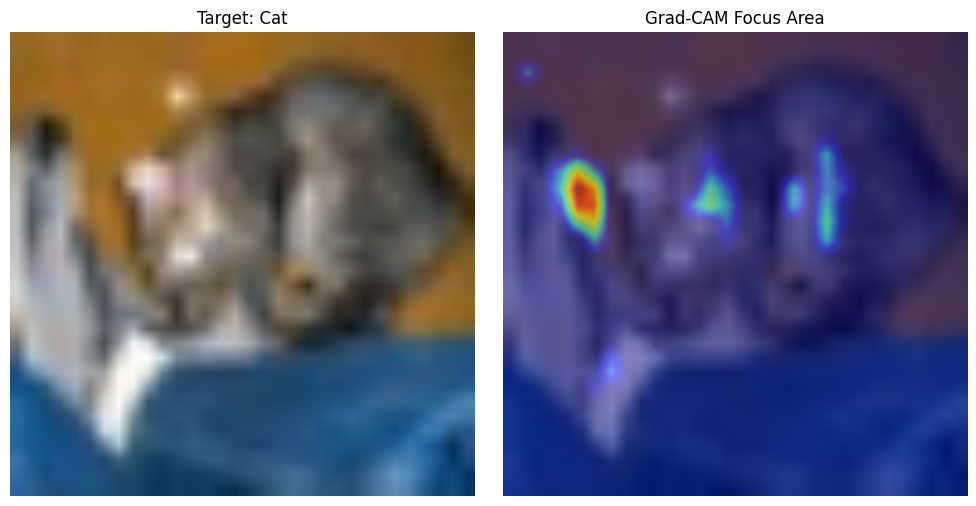

In [27]:
# ---7: Visualizing the Model's "Thought Process" ---

# Grab a single batch from the test set to pick an example image
data_iter = iter(testloader_clean)
images, labels = next(data_iter)

# Let's just look at the first image in the batch for now
sample_idx = 0
input_tensor = images[sample_idx].unsqueeze(0).to(device)
true_label = labels[sample_idx].item()

# Use our Grad-CAM tool to see what the CNN focused on
# (Note: Using the 'cam_tool' we initialized in the previous step)
heatmap = cam_tool.compute_heatmap(input_tensor)

# We need to de-normalize the image tensor back to a viewable RGB format
img_display = images[sample_idx].permute(1, 2, 0).cpu().numpy()
# Simple min-max scaling to get the pixel values back into the [0, 1] range
img_display = (img_display - img_display.min()) / (img_display.max() - img_display.min())

# Setup the side-by-side comparison
plt.figure(figsize=(10, 5))

# Plot 1: The clean input image
plt.subplot(1, 2, 1)
plt.imshow(img_display)
plt.title(f"Target: {class_names[true_label]}")
plt.axis("off")

# Plot 2: The heatmap overlay
plt.subplot(1, 2, 2)
plt.imshow(img_display)
# We use the 'jet' colormap for that classic red-to-blue 'hot' effect
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM Focus Area")
plt.axis("off")

plt.tight_layout()
plt.show()

## **Step 7: Interpreting the Heatmaps**
In this final section, we visualize the results of our Grad-CAM implementation. By overlaying the heatmap onto the original image, we can verify the "biological plausibility" of our model's logic.

Ideally, we want to see the "hot" regions (shown in red) tightly clustered around the actual object—like the body of a car or the wings of a bird—rather than randomly highlighting the background or the corners of the frame. This step is essential for building trust in the model's ability to generalize to new data.

## **Step 8: Insights and Findings**

Based on the evaluation results and the Grad-CAM visualization, we can draw several key conclusions about our custom CNN model's performance:

### 1. Performance Summary
* **Overall Accuracy:** The model achieved a solid **65.89%** accuracy on the CIFAR-10 test set.
* **Top Performers:** The model excelled at identifying **Frogs** (83% precision) and **Automobiles** (85% recall).
* **Challenging Categories:** **Cats** proved to be the hardest class for the model, with a notably lower recall of 39% and an F1-score of only 0.44.

### 2. Failure Analysis
* The classification report highlights a common trend in computer vision: the model struggles to differentiate between similar semantic categories.
* The lower metrics for **Cats** and **Dogs** (F1-scores of 0.44 and 0.59 respectively) suggest the model struggles with fine-grained animal classes (cat, bird, dog), indicating texture and pose sensitivity.
* Conversely, The model shows strong performance on rigid object classes **(automobile, ship, truck)** and achieved much higher F1-scores of 0.76 each.

### 3. Interpretability Insights (Grad-CAM)
* **Targeted Focus:** Our Grad-CAM visualization for the "Cat" class shows that the model isn't just looking at the whole image randomly.
* **Feature Importance:** It is specifically focusing on the facial features and the ears of the animal, as indicated by the "hot" regions aligned with the subject's head.
* **Model Validation:** This confirms that our convolutional layers have successfully learned to detect relevant biological textures rather than getting distracted by background noise.

**============================================================================================================================================================================================================**